### Imports

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

### State

In [3]:
class LLMState(TypedDict):
    question: str
    answer: str

### Node Function

In [4]:
def LLMWorkflow(state: LLMState) -> LLMState:
    model = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash",
        temperature=0.5
    )
    prompt = f"Answer the question: {state['question']}"
    answer = model.invoke(prompt)
    state["answer"] = answer.content
    return state

### Define Graph

In [5]:
graph = StateGraph(LLMState)

### Add Nodes

In [6]:
graph.add_node("LLM_workflow", LLMWorkflow)

### Add Edges

In [7]:
graph.add_edge(START, "LLM_workflow")
graph.add_edge("LLM_workflow", END)

### Compile Graph

In [8]:
workflow = graph.compile()

### Run

In [9]:
workflow.invoke({"question": "What is the capital of France?"})

{'question': 'What is the capital of France?',
 'answer': 'The capital of France is **Paris**.'}

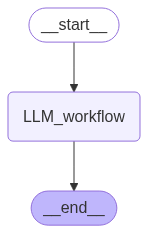

In [10]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())